# **Machine Learning Technique-Regression**

---


Sebagai data analis di perusahaan Mobil Bekas Saudi, tanggung jawab utama saya berkisar pada menganalisis data untuk mengoptimalkan strategi penetapan harga dan memprediksi hasil penjualan mobil bekas. Melalui analisis menyeluruh terhadap kumpulan data yang berisi atribut relevan seperti merek, model, jarak tempuh, dan harga jual, Anda bertujuan untuk mengidentifikasi pola dan wawasan yang menginformasikan keputusan penetapan harga.

ini melibatkan pembuatan model prediktif untuk memperkirakan volume penjualan di masa depan, memungkinkan manajemen inventaris yang lebih baik dan perencanaan bisnis yang tepat.
Pada akhirnya, analisis ini dapat mendorong keberhasilan perusahaan dalam lanskap pasar mobil bekas yang dinamis dan kompetitif di Arab Saudi.

Presented BY :
**Nur Khadijah Nasution**

---

## **Background Used Car Price Prediction**


The dataset "data_saudi_used_cars.csv" merupakan kumpulan data yang mengumpulkan informasi tentang mobil bekas yang tersedia di pasar Arab Saudi, data mencakup berbagai atribut utama yang terkait dengan setiap mobil, seperti merek, model, tahun pembuatan, jarak tempuh, jenis bahan bakar, dan harga jual.

Tujuan analisis adalah untuk memberikan wawasan berharga bagi penjual mobil bekas di Arab Saudi dan prediksi harga jual mobil bekas, termasuk mengidentifikasi tren pasar, memahami faktor-faktor yang mempengaruhi harga mobil bekas, dan mengembangkan model prediksi harga yang akurat. Oleh karena itu, kumpulan data ini berpotensi meningkatkan efisiensi dan transparansi di pasar mobil bekas di Arab Saudi.

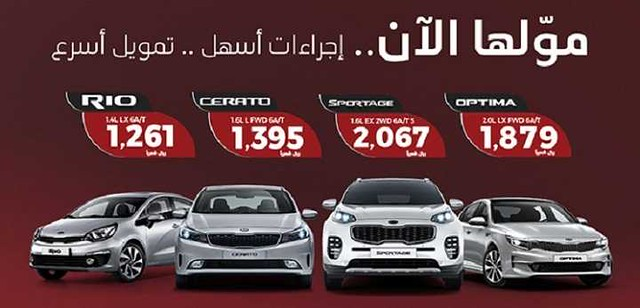

---
**Problems:**

Bagaimana efisiensi dapat ditingkatkan dalam memprediksi harga jual mobil bekas agar mengoptimalkan permintaan pasar?

**Goals:**

- Mengoptimalkan Perediksi Harga Jual Mobil Bekas

     Analisis menyeluruh terhadap berbagai faktor, termasuk kondisi fisik mobil, tren pasar, dan pengaruh eksternal seperti kondisi ekonomi dan permintaan konsumen.

- Meningkatkan Efisiensi Penjualan Mobil

     Meningkatkan efisiensi penjualan mobil mencakup strategi seperti pelatihan karyawan, analisis data, otomatisasi, dan peningkatan layanan pelanggan. Dengan menerapkan langkah-langkah ini, bisnis dapat meningkatkan **sales volume**, kepuasan pelanggan, dan  **overall profitability**.

---

## Data Understanding

In [110]:
# Load Library

# Data Manipulation
import pandas as pd
import numpy as np

# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm
import xgboost as xgb
from xgboost import XGBRegressor

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold,cross_validate
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,recall_score

# Warning
import warnings
warnings.filterwarnings("ignore")

In [111]:
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


**Attributes Information**

| No.  | Field Name      | Description                                      |
|------|-----------------|--------------------------------------------------|
| 1    | Type            | Type of used car.     |
| 2    | Region          | he region in which the used car was offered for sale.             |
| 3    | Make            | The company name.              |
| 4    | Gear_Type       | Gear type size of used car.|
| 5    | Origin          | Origin of used car.   |
| 6    | Options         | Options of used car.         |
| 7    | Year            | Manufacturing year.            |
| 8    | Engine_Size     | The engine size of used car.         |
| 9    | Mileage         | Mileage of used car        |
| 10   | Negotiable      | True if the price is 0, that means it is negotiable.   |
| 11   | Price           | Used car price.                                  |

## Data Preparation
The next process is to prepare good quality data. Data preparation processes include Data Cleaning, Handling Outliers, Feature Selection, Data Splitting, Encode, and Scaling.

### Data Cleaning

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [113]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [114]:
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

catatan:

Setelah Anda melakukan pengecekan apakah ada nilai yang hilang (missing values) di dalam DataFrame dan hasilnya adalah 0, ini berarti bahwa tidak ada nilai yang hilang dalam DataFrame berikut. Dengan kata lain, setiap sel dalam DataFrame memiliki nilai yang valid dan tidak ada nilai yang kosong atau NaN.

### Check nilai unique per columns

In [115]:
columns_of_interest = df.columns

In [116]:
for column in columns_of_interest:
    unique_values = df[column].unique()
    unique_values_str = "\n  ".join(map(str, unique_values))
    print(f"Unique values in column {column}:\n  {unique_values_str}\n")

Unique values in column Type:
  Corolla
  Yukon
  Range Rover
  Optima
  FJ
  CX3
  Cayenne S
  Sonata
  Avalon
  LS
  C300
  Land Cruiser
  Hilux
  Tucson
  Caprice
  Sunny
  Pajero
  Azera
  Focus
  5
  Spark
  Camry
  Pathfinder
  Accent
  ML
  Tahoe
  Yaris
  Suburban
  A
  Altima
  Traverse
  Expedition
  Senta fe
  Liberty
  3
  X
  Elantra
  Land Cruiser Pickup
  VTC
  Malibu
  The 5
  A8
  Patrol
  Grand Cherokee
  SL
  Previa
  SEL
  Aveo
  MKZ
  Victoria
  Datsun
  Flex
  GLC
  ES
  Edge
  6
  Escalade
  Innova
  Navara
  H1
  G80
  Carnival
  Symbol
  Camaro
  Accord
  Avanza
  Land Cruiser 70
  Taurus
  C5700
  Impala
  Optra
  S
  Other
  Cerato
  Furniture
  Murano
  Explorer
  LX
  Pick up
  Charger
  H6
  BT-50
  Hiace
  Ranger
  Fusion
  Rav4
  Ciocca
  CX9
  Kona
  Sentra
  Sierra
  Durango
  CT-S
  Sylvian Bus
  Navigator
  Opirus
  Marquis
  The 7
  FX
  Creta
  D-MAX
  CS35
  The 3
  Dyna
  GLE
  Sedona
  Prestige
  CLA
  Lumina
  Vanquish
  Sorento
  Safrane
  Cor

In [117]:
df.duplicated().sum()

4

In [118]:
df_new = df.drop_duplicates()

data yang duplikat akan dihapus sehingga tidak ada data yang berulang.

### Outliers Detection

Text(0.5, 1.0, 'Price Spread')

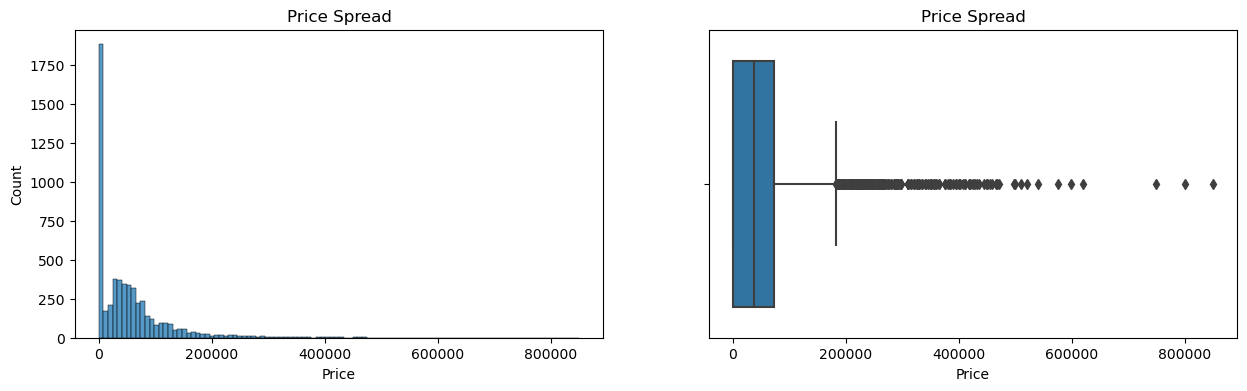

In [119]:
# Price
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Price Spread')
sns.histplot(x=df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.subplot(1,2,2)
sns.boxplot(df,x='Price')
plt.title('Price Spread')

- terlihat dari grafik diatas sangat condong ke kanan(right skewed) dengan data terbanyak adalah nilai 0.
- Karena tujuan Analisis Regresi ini adalah untuk memprediksi harga jual suatu mobil, terlepas dari apakah harga mobil tersebut bisa ditawar atau tidak, data yang dibutuhkan adalah data dimana penjual secara jelas menentukan harga mobil (bukan 0). Oleh karena itu, data yang memiliki harga jual sama dengan 0 akan dihapus.

In [120]:
df_new = df_new[df_new['Price'] != 0]

In [121]:
# validate

df_new['Price'].sort_values()

3131         1
3992       500
4399       850
5128       884
3474       950
         ...  
4653    599000
2120    620000
4273    748000
4684    800000
3513    850000
Name: Price, Length: 3824, dtype: int64

Oops, ternyata ada nilai yang masih kurang masuk akal untuk dijadikan harga jual sebuah mobil, misalnya 1 riyal. Oleh karena itu, ditetapkan ambang batas minimal harga jual mobil bekas adalah 5.000 riyal.

In [122]:
df_new = df_new.drop(df_new[df_new['Price'] < 5000].index)

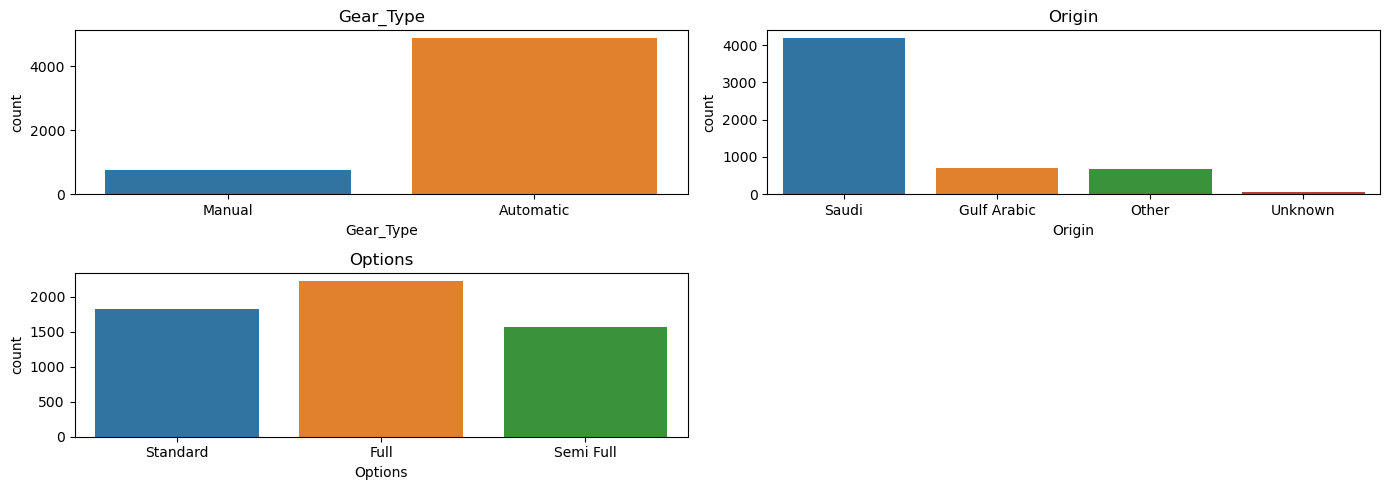

In [123]:
catg_feature = ['Gear_Type', 'Origin', 'Options']

plt.figure(figsize=(14,5))

for i, feature in enumerate(catg_feature, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(feature)

plt.tight_layout()
plt.show()

insight:

Gear_Type
- Gear_Type didominasi oleh  Automatic,hal ini meningkatnya preferensi terhadap transmisi Automatic.

Origin
- Distribusi asal kendaraan di dominasi `Saudi`,
- terdapat kategori `Unknown` pada kolom `Origin` dengan distribusi paling sedikit, artinya kategori ini bisa dihapus karena kurangnya informasi yang dapat mempengaruhi analisis dan keputusan terhadap data.

Options
- preferensi pelanggan terhadap fitur `full`lebih banyak dibandingkan yang lain. artinya pelanggan menganggap fitur penting.

In [124]:
df_new = df_new[df_new['Origin'] != 'Unknown']

<Axes: xlabel='Year'>

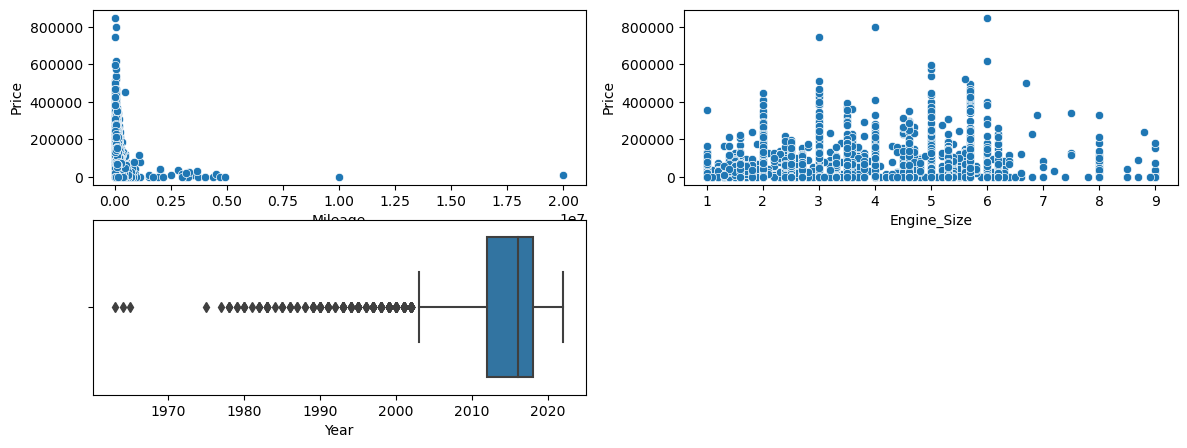

In [125]:
plt.figure(figsize=(14,5))
plt.subplot(2,2,1)
sns.scatterplot(df, x='Mileage', y='Price')

plt.subplot(2,2,2)
sns.scatterplot(df, x='Engine_Size', y='Price')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='Year')

insight:

Mileage vs Price
- ada korelasi negatif antara jarak tempuh dan harga.
- semakin tinggi jarak tempuh, semakin rendah harga mobilnya. cenderung mengalami lebih banyak keausan dan kerusakan, sehingga nilainya menurun.

Engine Size vs Price
- ada korelasi positif antara ukuran mesin dan harga.
- semakin besar ukuran mesin, semakin tinggi harga mobilnya. dikarenakan mesin yang lebih besar cenderung lebih kuat dan sering kali lebih mahal untuk diproduksi.

Box Plot: Year
- setelah di cross check tahun mobil dibawah 2000 atau mobil tua lebih sedikit dibandingkan dengan mayoritas data, jadi diputuskan untuk menggunakan tahun 2000 ke atas.


In [126]:
df_new = df_new.drop(df_new[df_new['Year'] < 2000].index)

In [127]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(df_new):
    q1 = df_new.quantile(0.25)
    q3 = df_new.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [128]:
# Outliers pada fitur price
find_anomalies(df_new['Price'])

IQR: 58000.0
limit_bawah: -50000.0
limit_atas: 182000.0


In [129]:
# Outliers pada fitur price
find_anomalies(df_new['Mileage'])

IQR: 132000.0
limit_bawah: -148000.0
limit_atas: 380000.0


In [130]:
# Outliers pada fitur price
find_anomalies(df_new['Engine_Size'])

IQR: 2.0
limit_bawah: -1.0
limit_atas: 7.0


In [131]:
# Outliers pada fitur price
find_anomalies(df_new['Year'])

IQR: 4.0
limit_bawah: 2008.0
limit_atas: 2024.0


### Correlations

Ketika dua variabel berkorelasi tinggi, maka keduanya mempunyai pengaruh yang sama terhadap variabel terikat yang ingin kita prediksi. Dalam hal ini, disarankan untuk membuang salah satunya.

<Axes: >

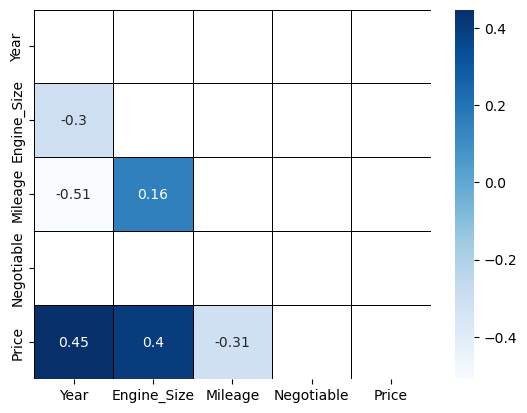

In [132]:
matrix_up =np.triu(df.corr(numeric_only=True))
sns.heatmap(data=df_new.corr(numeric_only=True,method='spearman'), cmap='Blues',annot=True,mask=matrix_up,linecolor='black',linewidths=0.5)

In [133]:
df['Price'].corr(df['Negotiable'], method='spearman')

-0.8208268948393858

Insight
- berdasarkan korelasi diatas, Price dan Year memiliki korelasi positif moderat yang menunjukkan bahwa adanya kecenderungan pasar untuk menilai mobil baru harga yang lebih tinggi. semakin tinggi tahun pembuatan mobil, maka semakin mahal harga mobil tersebut.
- Negotiable dan Price memiliki korelasi negatif kuat bahwa semakin mobil bekas bisa dinegosiasikan (Negotiable), maka semakin rendah harga mobil bekas (Price) atau sama dengan 0. artinya mobil dengan harga yang tinggi cenderung memiliki kebijakan harga yang kurang fleksibel sebaliknya mobil dengan harga yang lebih rendah memiliki kebijakan harga yang lebih fleksibel dan cenderung bisa dinegosiasikan. kemungkinan dipengaruhi oleh faktor lain dalam dataset.

### Uji Kruskal-Wallis

digunakan untuk melihat apakah terdapat perbedaan yang signifikan antara:
- fitur Region dan Price
- fitur Origin dan Price 

Hypothesis:

- Ho: Median Harga Mobil di tiap Daerah adalah sama
- Ha: Setidaknya ada satu wilayah yang mediannya berbeda

In [134]:
from scipy.stats import kruskal

# Hyptohesis Testing
stat, pval = kruskal(df_new[df_new['Region'] == 'Riyadh']['Price'],
                     df_new[df_new['Region'] == 'Hafar Al-Batin']['Price'],
                     df_new[df_new['Region'] == 'Abha']['Price'],
                     df_new[df_new['Region'] == 'Makkah']['Price'],
                     df_new[df_new['Region'] == 'Dammam']['Price'],
                     df_new[df_new['Region'] == 'Jeddah	']['Price'],
                     df_new[df_new['Region'] == 'Khobar']['Price'],
                     df_new[df_new['Region'] == 'Al-Baha']['Price'],
                     df_new[df_new['Region'] == 'Al-Ahsa']['Price'],
                     df_new[df_new['Region'] == 'Jazan']['Price'],
                     df_new[df_new['Region'] == 'Aseer']['Price'],
                     df_new[df_new['Region'] == 'Al-Medina']['Price'],
                     df_new[df_new['Region'] == 'Al-Namas']['Price'],
                     df_new[df_new['Region'] == 'Taef']['Price'],
                     df_new[df_new['Region'] == 'Qassim']['Price'],
                     df_new[df_new['Region'] == 'Sabya']['Price'],
                     df_new[df_new['Region'] == 'Al-Jouf']['Price'],
                     df_new[df_new['Region'] == 'Yanbu']['Price'],
                     df_new[df_new['Region'] == 'Najran']['Price'],
                     df_new[df_new['Region'] == 'Hail']['Price'],
                     df_new[df_new['Region'] == 'Tabouk']['Price'],
                     df_new[df_new['Region'] == 'Jubail']['Price'],
                     df_new[df_new['Region'] == 'Wadi Dawasir']['Price'],
                     df_new[df_new['Region'] == 'Besha']['Price'],
                     df_new[df_new['Region'] == 'Sakaka	']['Price'],
                     df_new[df_new['Region'] == 'Qurayyat']['Price']
                    )

if pval < 0.05:
    print("Reject H0/Accept Ha")
else:
    print("Accept H0/Reject Ha")

Accept H0/Reject Ha


Insight:

Hasil Uji Kruskal Wallis menunjukkan median harga jual mobil di setiap daerah adalah sama. Hal ini menunjukkan bahwa tidak ada Wilayah yang berpengaruh signifikan terhadap harga jual suatu mobil. Jadi dapat dikatakan variabel Wilayah tidak berpengaruh terhadap variabel Target (Price).

In [135]:
# Hypothesis Testing

stat, pval = kruskal(df_new[df_new['Origin'] == 'Saudi']['Price'],
                     df_new[df_new['Origin'] == 'Gulf Arabic']['Price'],
                     df_new[df_new['Origin'] == 'Other']['Price'],
                     df_new[df_new['Origin'] == 'Unknown']['Price']
                    )

if pval < 0.05:
    print("Reject H0/Accept Ha")
else:
    print("Accept H0/Reject Ha")

Accept H0/Reject Ha


Insight:

Hasil Uji Kruskal Wallis menunjukkan setidaknya median harga jual mobil di salah satu asal sama. Jadi dapat dikatakan variabel Asal tidak mempunyai pengaruh terhadap variabel Target (Price). Jadi dapat dikatakan variabel Wilayah tidak berpengaruh terhadap variabel Target (Price).

### Drop Columns

- Jika ditinjau berdasarkan domain knowledge, fitur `Negotiable`, `Gear_Type`, `Region`,`Origin` tidak memiliki relevansi dan kepentingan untuk analisis prediktif.
- Fitur `Negotiable` lebih ke indikasi fleksibilitas dalam penawaran harga daripada faktor langsung yang menentukan harga mobil.
- Fitur `Gear_Type` juga tidak diperlukan untuk membangun model prediktif karena biasanya tidak sebesar faktor-faktor seperti tipe mobil atau merek.
- Fitur `Region` cenderung lebih tidak konsisten dibandingkan fitur-fitur yang dipilih.
- Strategi pemasaran global mungkin menetapkan harga yang konsisten di berbagai wilayah untuk membangun merek yang kuat dan menjaga keseragaman pengalaman konsumen. Fitur `Origin` menjadi kurang relevan dalam menentukan harga.

## Clean Dataset

In [136]:
# Cek dataset yang sudah bersih
df_new.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


In [137]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3669 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3669 non-null   object 
 1   Region       3669 non-null   object 
 2   Make         3669 non-null   object 
 3   Gear_Type    3669 non-null   object 
 4   Origin       3669 non-null   object 
 5   Options      3669 non-null   object 
 6   Year         3669 non-null   int64  
 7   Engine_Size  3669 non-null   float64
 8   Mileage      3669 non-null   int64  
 9   Negotiable   3669 non-null   bool   
 10  Price        3669 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 318.9+ KB


Pada akhirnya, tersisa 3669 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 30% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

## Feature Engineering

Define X and y

In [138]:
X = df_new.copy().drop(columns=['Price','Negotiable','Region','Gear_Type','Origin'])
y = df_new['Price'] 

Train and Test Splitting

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

catatan:

train_test_split mengambil beberapa argumen:

- X: Ini adalah dataset fitur (features). Ini adalah data input yang akan digunakan untuk melatih model.
- y: Ini adalah target atau label (labels). Ini adalah data output yang akan digunakan untuk melatih model.
- test_size=0.3: Parameter ini menentukan proporsi dari dataset yang akan digunakan sebagai test set. Dalam hal ini, 30% dari data akan digunakan untuk pengujian dan 70% untuk pelatihan.
- random_state=0: Parameter ini digunakan untuk memastikan bahwa pembagian data dilakukan secara acak namun konsisten setiap kali kode dijalankan. Menetapkan random_state ke nilai tertentu (misalnya, 0) memastikan bahwa hasil pembagian data akan selalu sama, yang memudahkan dalam proses debugging dan reproduksi hasil.

Encoding & Scaling

In [140]:
# Encode & Scale 

preprocessor = ColumnTransformer([
    ('One Hot', OneHotEncoder(handle_unknown='ignore'), ['Options','Make']),
    ('Binary', ce.BinaryEncoder(), ['Type']),
    ('scaler', RobustScaler(), ['Year','Engine_Size', 'Mileage'])
], remainder='passthrough'
)


preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Options', 'Make']),
                                ('Binary', BinaryEncoder(), ['Type']),
                                ('scaler', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

Noted:

OneHotEncoder
- kategorikal `'Options'` `make`

 OneHotEncoder untuk mengubah fitur kategorikal 'Options' dan 'make' menjadi representasi one-hot karena fitur-fitur tersebut memiliki beberapa nilai unik yang tidak memiliki urutan atau tingkatan. 

BinaryEncoder
- fitur kategorikal 'Type' menjadi representasi biner.

BinaryEncoder digunakan untuk mengonversi fitur kategorikal 'Type' menjadi representasi biner. Binary encoding berguna saat kita memiliki fitur kategorikal dengan banyak nilai unik dan ingin mengurangi dimensi fitur setelah transformasi. 

RobustScaler
- untuk menyeimbangkan skala fitur-fitur numerik 'Year', 'Engine_Size', dan 'Mileage'.

RobustScaler digunakan untuk menyeimbangkan skala fitur-fitur numerik seperti 'Year', 'Engine_Size', dan 'Mileage'. Metode ini lebih tangguh terhadap pencilan (outliers) dibandingkan dengan standar scaler karena menggunakan median dan quartile range. 


## Modeling 
Choose a Benchmark Model

In [141]:
# ML algorithm
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)


In [142]:
# Daftar model
models = [lr, ridge, lasso, knn, dt, rf, xgb]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Evaluasi metrik
scoring_metrics = {
    'neg_root_mean_squared_error': {'means': [], 'stds': []},
    'neg_mean_absolute_error': {'means': [], 'stds': []},
    'neg_mean_absolute_percentage_error': {'means': [], 'stds': []}
}

# K-Fold Cross-Validation
crossval = KFold(n_splits=5, shuffle=True, random_state=101)

for model in models:
    estimator = Pipeline([
        ('preproces', preprocessor),
        ('model', model)
    ])
    
    for metric in scoring_metrics.keys():
        scores = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring=metric, error_score='raise')
        
        scoring_metrics[metric]['means'].append(scores.mean())
        scoring_metrics[metric]['stds'].append(scores.std())
        
# Menyusun hasil ke DataFrame
results = {
    'Model': model_names
}

for metric in scoring_metrics.keys():
    metric_name = metric.replace('neg_', '').replace('_', ' ').upper()
    results[f'{metric_name} Mean'] = scoring_metrics[metric]['means']
    results[f'{metric_name} Std'] = scoring_metrics[metric]['stds']

results_df = pd.DataFrame(results)

# Menampilkan DataFrame hasil
print(results_df)


               Model  ROOT MEAN SQUARED ERROR Mean  \
0  Linear Regression                 -45338.621525   
1              Ridge                 -45261.705712   
2              Lasso                 -45368.093581   
3                KNN                 -37600.434755   
4      Decision Tree                 -41246.963188   
5      Random Forest                 -32655.130921   
6            XGBoost                 -31371.995447   

   ROOT MEAN SQUARED ERROR Std  MEAN ABSOLUTE ERROR Mean  \
0                  3994.932844             -27556.989695   
1                  4437.048212             -27361.661583   
2                  4129.108531             -27517.792938   
3                  4997.540175             -19234.396818   
4                  4422.478355             -20804.328656   
5                  4821.360839             -15646.215232   
6                  3601.524804             -15787.198398   

   MEAN ABSOLUTE ERROR Std  MEAN ABSOLUTE PERCENTAGE ERROR Mean  \
0               846

Insight:

Terdapat perbedaan signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE,MAPE XGBoost adalah model terbaik. sedangkan RandomForest memiliki nilai MAE paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

## Predict to Test Set with the Benchmark Model
Prediksi pada test set dengan menggunakan model

### Benchmark Model 

In [143]:
y_test

1194    117000
188     125000
2496     43000
5227     72000
3227    220000
         ...  
1597     42000
1207     37000
5141     41500
1733     75000
1198     86900
Name: Price, Length: 1101, dtype: int64

In [144]:
# Benchmark 2 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', preprocessor),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, ypred)))
    score_mae.append(mean_absolute_error(y_test, ypred))
    score_mape.append(mean_absolute_percentage_error(y_test, ypred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,29128.590712,14551.914472,0.219601
XGBRegressor,28339.193053,14504.226075,0.218433


- Ketika dilakukan prediksi pada test set, performa XGBRegressor secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai MAPE dan MAE yang sedikit lebih rendah dari RandomForest .
dapat disimpulkan XGBRegressor memiliki performa yang sedikit lebih baik dalam hal RMSE, MAE, dan MAPE.

## Hyperparameter Tuning

Karena model XGBRegressor memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBRegressor ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBRegressor dengan harapan dapat meningkatkan performa model.

In [145]:
# define model
models = XGBRegressor(random_state=1,verbosity=0)

# Hyperparam space xgboost
hyperparam_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_child_weight': [1, 3, 5],
    'model__gamma': [0, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.01, 0.1],
    'model__reg_lambda': [1, 1.5, 2]}

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# untuk estimator
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('model', models)
])

# # define grid search
# gridsearch = GridSearchCV(
#     estimator= pipeline_xgb,
#     param_grid= hyperparam_xgb,
#     cv= 5,
#     scoring =  ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],  
#     refit = 'neg_mean_absolute_error',
#     n_jobs= -1
# )
# gridsearch

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    pipeline_xgb, 
    param_distributions = hyperparam_xgb,
    n_iter = 300,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)

random_xgb

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Options',
                                                                                'Make']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              XGBRe...
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7],
                                        'model__min_child_weight': [1, 3, 5],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__reg_alpha': [0, 0.01, 0.1],
                                        'model__reg_lambda': [1, 1.5, 2],
                                        'model__subsample': [0.8, 0.9, 1.0]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [146]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Options',
                                                                                'Make']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              XGBRe...
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7],
                                        'model__min_child_weight': [1, 3, 5],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__reg_alpha': [0, 0.01, 0.1],
                                        'model__reg_lambda': [1, 1.5, 2],
                                        'model__subsample': [0.8, 0.9, 1.0]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [147]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=[ 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__min_child_weight,param_model__max_depth,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
47,0.584666,0.050413,0.033297,0.003954,0.8,1.5,0,300,1,7,...,1063.037283,1,-0.224014,-0.208883,-0.218911,-0.211084,-0.190805,-0.210739,0.011348,1
129,0.502599,0.013988,0.032681,0.005539,0.9,1.5,0,300,1,7,...,1343.698232,2,-0.226154,-0.214436,-0.224800,-0.205761,-0.188984,-0.212027,0.013702,2
152,0.333119,0.009688,0.028151,0.003292,1.0,1,0,200,1,7,...,1212.331258,8,-0.225226,-0.213460,-0.236776,-0.207079,-0.193164,-0.215141,0.014971,3
140,0.396341,0.012431,0.027639,0.004000,0.9,1.5,0.1,200,1,7,...,1223.991565,14,-0.230741,-0.219907,-0.222930,-0.213633,-0.192338,-0.215910,0.013008,4
185,0.438125,0.042896,0.030765,0.010809,0.9,1,0.1,200,1,7,...,1249.935376,3,-0.236289,-0.210293,-0.232640,-0.209132,-0.195801,-0.216831,0.015316,5


In [148]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -28861.981178624155
Best_params: {'model__subsample': 0.8, 'model__reg_lambda': 1.5, 'model__reg_alpha': 0, 'model__n_estimators': 300, 'model__min_child_weight': 1, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 0.9}


## Cara kerja algoritma XGBoost

XGBoost adalah teknik ensemble learning yang menggabungkan prediksi dari beberapa model dasar (biasanya pohon keputusan) untuk menghasilkan prediksi yang lebih akurat. 
berikut beberapa poin yang menggambarkan cara kerja algoritma tersebut:

1. Boosting

    dengan memberi bobot lebih besar pada contoh yang sulit diprediksi oleh model sebelumnya,sehingga model berikutnya dapat fokus pada contoh-contoh tersebut.

2. Gradient Descent
    mengoptimalkan penggunaan model untuk meminimalkan fungsi kerugian secara iteratif dnegantujuan meminimalkan fungsi kerugian secara efektif.

3. Regresi Pohon Keputusan

    setiap pohon baru dibangun untuk memperbaiki kesalahan dari pohon sebelumnya, menciptakan prediksi yang lebih akurat secara berurutan.

4. Regularisasi

    untuk mengurangi kompleksitas model dan meningkatkan generalisasi dengan mengurangi bobot dari fitur yang tidak relevan atau kurang penting. 

## Final Model

Predict to test set berdasarkan model terpilih yaitu XGBoosts

In [149]:
model_xgb = {'XGBoost': XGBRegressor(random_state=1,verbosity=0)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# fitting 
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model_xgb.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,26002.304279,13372.655092,0.194257


### **Performance Comparison**

Perbandingan performa model XGBRegressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [150]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGBRegressor']).T

,RMSE,MAE,MAPE
XGBRegressor,28339.193053,14504.226075,0.218433


In [151]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,26002.304279,13372.655092,0.194257


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 28339.19, 14504.22, 0.21
- RMSE, MAE & MAPE setelah tuning: 26002.30, 13372.65, 0.19

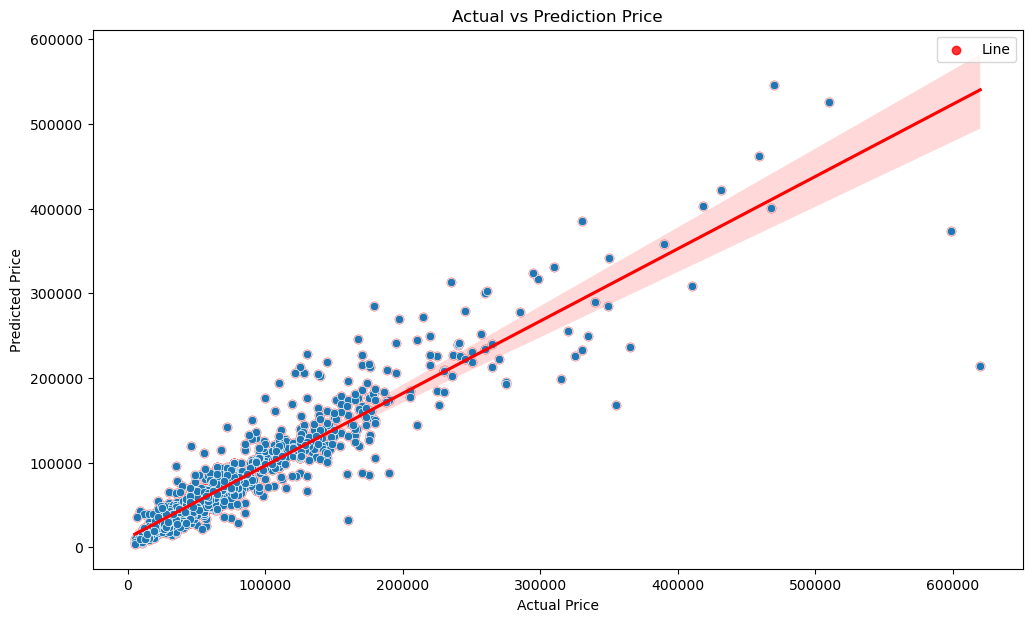

In [152]:
plt.figure(figsize=(12, 7))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning,color='red',label='Line')
sns.scatterplot(x= y_test, y= y_pred_xgb_tuning).set(title='Actual vs Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Insight:
- Tidak terdapat kesalah prediksi yang signifikan karena titik data mendekati garis regresi, menunjukkan bahwa model prediksi memiliki akurasi yang baik.
- Dengan melihat rentang harga, outlier tidak mempengaruhi performa model.

## Explainable ML
Penggunaan model pembelajaran mesin untuk ekstraksi pengetahuan yang relevan tentang hubungan domain yang terdapat dalam data

### Feature Importances

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (Price), kita dapat mengeceknya melalui function feature_importances_.

In [153]:
df_new.Type

1             Yukon
2       Range Rover
3            Optima
5               CX3
6         Cayenne S
           ...     
5616            CX9
5618       Suburban
5619        X-Trail
5621          Yukon
5622             RX
Name: Type, Length: 3669, dtype: object

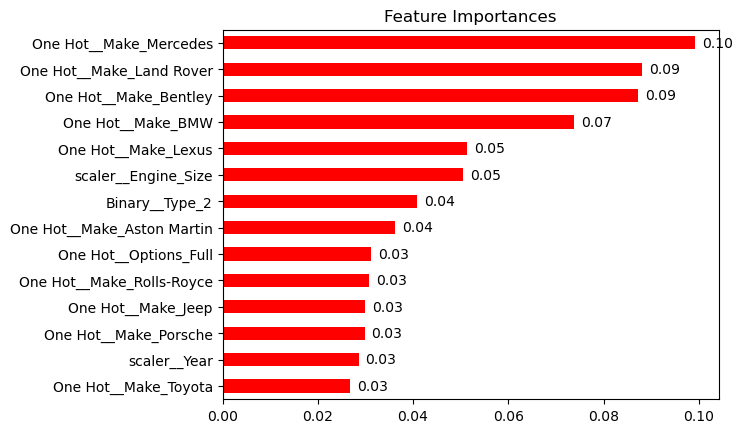

In [154]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, preprocessor.get_feature_names_out()).sort_values(ascending=True).tail(14)
ax = feature_imp.plot(kind='barh', color='red')
ax.set_title('Feature Importances')

# Add anotasi pada plot
for i in ax.patches:
    ax.annotate(f'{i.get_width():.2f}', 
                xy=(i.get_width(), i.get_y() + i.get_height() / 2), 
                xytext=(5, 0),  # 5 points horizontal offset
                textcoords='offset points',
                ha='left', va='center')

plt.show()

insight:
- Fitur `Make`: Mercedes merupakan prediktor utama untuk harga(Price).
- disimpulkan juga merek mobil yang memiliki pengaruh terbesar terhadap harga(Price) seperti `Land Rover, Bentley, BMW, Lexus , Aston Martin,Rolls Royce, Jeep,Porsche, Toyota`. ini menunjukkan Merek-merek ini terkenal dengan kendaraan mewah dan premium, yang secara signifikan mempengaruhi nilai jual kendaraan.

- Fitur `Engine_Size` merupakan indikator utama dari kinerja kendaraan. artinya kapasitas mesin yang lebih besar sering kali harganya lebih tinggi.

- Fitur `Option Full`, mobil dengan opsi lengkap cenderung memiliki harga yang lebih tinggi karena fitur tambahan meningkatkan kenyamanan, kinerja, dan keamanan.

- Fitur `Year` Tahun pembuatan kendaraan juga cenderung memiliki pengaruh terhadap harga(Price), ini dikarenakan Mobil yang lebih baru dengan harga lebih tinggi karena teknologi yang lebih mutakhir, lebih sedikit keausan, dan nilai yang lebih tinggi di pasar sekunder.

## Conclusion

### Model

1. Model terbaik yang diperoleh selama proses pemodelan untuk memprediksi harga mobil bekas adalah model XGBoost.

2. Setelah proses Hyperparameter Tuning dan Predicting Test Set, ditemukan bahwa model XGBoost berkinerja lebih baik dalam hal metrik RMSE, MAE, dan MAPE dibandingkan dengan model RandomForest.

3. Fitur yang paling mempengaruhi harga mobil bekas di Arab Saudi adalah `Make`(merek mobil) seperti `Mercedes,Land Rover, Bentley, BMW, Lexus , Aston Martin,Rolls Royce, Jeep,Porsche,Toyota` yang terkenal dengan kendaraan mewah dan premium. Fitur tambahan `Option Full`, `Engine_Size` (kapasitas mesin).

4. Jika dilihat dari nilai MAPE yang dihasilkan model setelah tuning hyperparameter yaitu sebesar 19,42%, berarti estimasi rata-rata akan menyimpang sekitar 19,42% dari nilai sebenarnya.

5. Model XGBoost pada dataset data_saudi_used_cars, dapat memprediksi harga mulai dari 5000 - 850000 riyal, kisaran tahun pembuatan mobil 2000 – 2021, dan kapasitas mesin tidak melebihi 9.0.

### Business

1. Biaya implementasi model machine learning (ML).include: pengembangan,pemeliharaan, update model, sdm yang terlibat serta biaya infrastruktur teknologi.

2. Analisis kelayakan metrik  sebelum dan setelah implementasi ML untuk meningkatkan revenue secara seignifikan.

3. Penilaian kecocokan model regresi menggunakan plot sisa untuk keputusan yang lebih terinformasi.

## Recommendation

### Model

1. Memperluas dataset dengan mengumpulkan data yang lebih terkini dan informatif terkait harga mobil bekas di Saudi Arabia. Model regresi diharapkan dapat lebih memahami pola dalam data, sehingga pada akhirnya meningkatkan akurasi prediksi.

2. Pertimbangkan untuk menambahkan fitur-fitur yang memiliki korelasi lebih signifikan dengan harga mobil bekas, seperti Accident History (Riwayat Kecelakaan),Fuel Type (Jenis Bahan Bakar).

3. Bisa bereksperimen dengan pendekatan lain yaitu semi-supervised learning dengan mengelompokkan harga mobil dengan nilai 0 (Negotiable variabel effect). pada saat pembersihan data,disepakati untuk menghapus mobil yang memiliki harga 0, namun apa akibatnya jika tidak menghapusnya tetapi mengelompokkannya berdasarkan spesifikasi mobil yang terlihat mirip dan menghitung rata-ratanya untuk membuat harga mobil yang memiliki harga 0 berdasarkan grup.

### Business

1. Eksplorasi strategi bisnis alternatif untuk meningkatkan pendapatan tanpa ketergantungan pada model ML. 

2. Setelah implementasi machine learning (ML), penting untuk mengevaluasi risiko dan keuntungan yang mungkin terjadi.

## Save Final Model XGBoost


Untuk menyimpan model XGBoost yang telah dilatih, Anda dapat menggunakan modul joblib atau pickle dalam Python. Berikut adalah cara menyimpan dan memuat model XGBoost menggunakan pickle:

In [155]:
# Save model
import pickle

estimator = Pipeline([('preprocess', preprocessor), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Saudi_Used_Cars_XGBRegressor.sav', 'wb'))